Making the model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

immo = pd.read_csv("../data/_data_clean_to_model.csv", index_col='id')
display(immo.head())
display(immo.shape)

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
id,,,,,,,,,,,,,,,,,,,,,
10616910,399000,1.0,2.0,125.0,2013.0,1.0,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616911,423000,2.0,3.0,155.0,2014.0,4.0,3.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616934,169000,0.0,1.0,54.0,1850.0,2.0,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616833,275000,1.0,1.0,66.0,2025.0,3.0,3.0,1,0,0.0,...,1,0,0,0,0,0,0,0,0,0
10616966,185000,3.0,2.0,74.0,1975.0,1.0,3.0,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0


(10540, 89)

In [5]:
display(immo.corr())
#immo.corr().to_csv('../data/_data_clean_correlation.csv')

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
price,1.000000,0.002659,0.409739,0.167857,0.032755,0.159733,-0.048914,-0.013537,0.089662,NaN,...,0.043370,-0.001241,0.007566,0.030817,0.002911,-0.023273,-0.027477,-0.061876,-0.031288,0.036870
floor,0.002659,1.000000,-0.013967,-0.005239,0.004085,-0.011411,0.035012,0.016034,-0.019313,NaN,...,-0.001962,-0.000604,-0.001047,-0.002430,-0.003997,-0.005463,0.001405,0.023530,-0.002522,-0.005721
bedroomCount,0.409739,-0.013967,1.000000,0.180915,-0.167238,0.237739,-0.309138,-0.301899,0.219145,NaN,...,-0.060452,-0.001319,0.000189,-0.064135,0.026418,0.049635,0.036273,0.060846,-0.006924,-0.026783
netHabitableSurface,0.167857,-0.005239,0.180915,1.000000,-0.055014,0.128492,-0.107297,-0.101573,0.043148,NaN,...,-0.024385,0.003894,0.007257,-0.037183,-0.005844,-0.001303,-0.001452,0.060237,-0.002534,0.017641
constructionYear,0.032755,0.004085,-0.167238,-0.055014,1.000000,-0.026452,0.123659,0.306831,-0.071308,NaN,...,0.277559,0.049298,0.047862,0.139060,-0.066080,-0.162576,-0.166718,-0.246069,-0.193622,0.256754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,-0.023273,-0.005463,0.049635,-0.001303,-0.162576,0.035661,-0.029881,-0.076425,0.024223,NaN,...,-0.115642,-0.017320,-0.015663,-0.199131,-0.170362,1.000000,-0.112949,-0.129470,-0.075703,-0.174904
E,-0.027477,0.001405,0.036273,-0.001452,-0.166718,0.019313,-0.031265,-0.079818,0.017228,NaN,...,-0.091076,-0.013641,-0.012336,-0.156830,-0.134172,-0.112949,1.000000,-0.101966,-0.059621,-0.137749
F,-0.061876,0.023530,0.060846,0.060237,-0.246069,0.077024,-0.124053,-0.162748,0.063502,NaN,...,-0.104397,-0.015636,-0.014140,-0.179768,-0.153797,-0.129470,-0.101966,1.000000,-0.068342,-0.157897
G,-0.031288,-0.002522,-0.006924,-0.002534,-0.193622,0.021966,-0.001392,-0.060697,0.006640,NaN,...,-0.061043,-0.009142,-0.008268,-0.105113,-0.089927,-0.075703,-0.059621,-0.068342,1.000000,-0.092325


<Axes: title={'center': 'correlation'}>

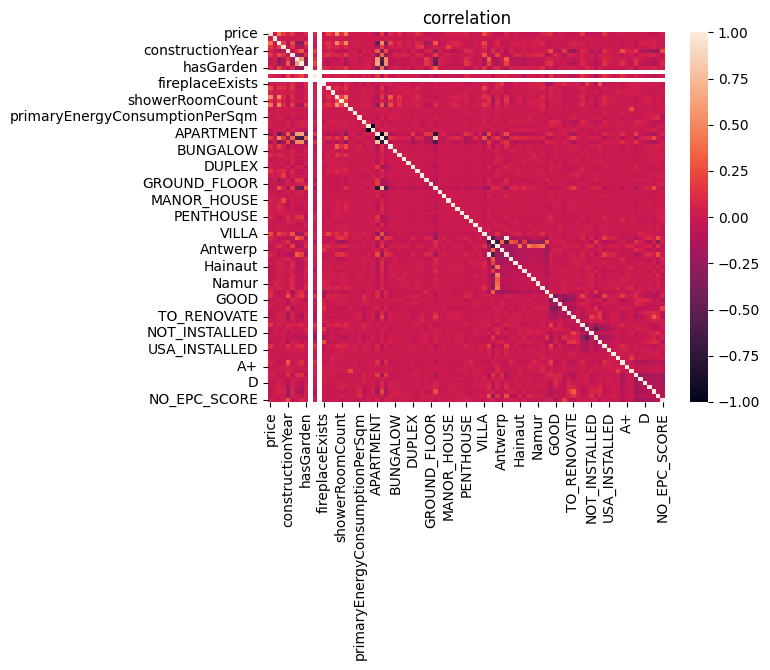

In [6]:
plt.title("correlation")
correlation = immo.corr()
sns.heatmap(correlation, annot=False, fmt='.2f')

In [7]:
X = pd.DataFrame(immo.drop(columns=['price', 'gardenSurface', 'terraceSurface', 'floor']))
y = np.array(immo.price).reshape(-1, 1)#target

print(X.shape)
print(y.shape)

(10540, 85)
(10540, 1)


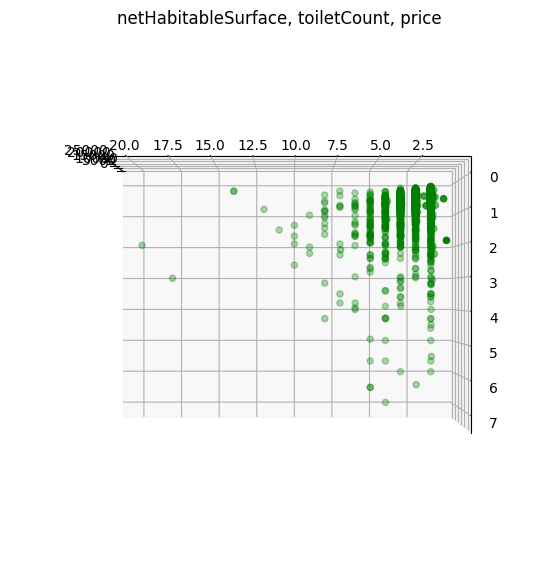

In [8]:
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(immo['netHabitableSurface'], immo['toiletCount'], immo['price'], color = "green")
ax.view_init(180, 180)
plt.title("netHabitableSurface, toiletCount, price")
 
# show plot
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scalar = StandardScaler()

normalized_x_train = np.array(pd.DataFrame(
    scalar.fit_transform(X_train),
    columns = X_train.columns
))

normalized_x_test = np.array(pd.DataFrame(
    scalar.transform(X_test),
    columns = X_test.columns
))

display(normalized_x_train)
display(normalized_x_test)
display(y_train)
display(y_test)

array([[-0.52655312, -0.15039233,  0.62180003, ..., -0.34504255,
        -0.19688774,  2.16779868],
       [ 0.85263919,  0.85422849, -0.18468255, ..., -0.34504255,
        -0.19688774, -0.46129745],
       [ 0.16304304, -0.1334724 ,  1.1941425 , ..., -0.34504255,
        -0.19688774, -0.46129745],
       ...,
       [ 0.16304304, -0.06367769, -0.08062028, ..., -0.34504255,
        -0.19688774, -0.46129745],
       [ 0.16304304,  0.02726693, -0.52288492, ..., -0.34504255,
        -0.19688774, -0.46129745],
       [ 0.16304304, -0.11232249, -0.57491606, ..., -0.34504255,
        -0.19688774, -0.46129745]])

array([[-0.52655312, -0.13558739,  1.06406467, ..., -0.34504255,
        -0.19688774, -0.46129745],
       [-0.52655312, -0.23076199,  0.20555095, ..., -0.34504255,
        -0.19688774, -0.46129745],
       [ 0.16304304,  0.03995688, -0.08062028, ..., -0.34504255,
        -0.19688774, -0.46129745],
       ...,
       [-0.52655312, -0.23499198, -0.31476039, ..., -0.34504255,
         5.07903634, -0.46129745],
       [-0.52655312, -0.17577222, -0.13265142, ..., -0.34504255,
        -0.19688774, -0.46129745],
       [-0.52655312, -0.10597751, -0.44483822, ..., -0.34504255,
        -0.19688774, -0.46129745]])

array([[329000],
       [449500],
       [462000],
       ...,
       [430000],
       [410000],
       [299000]], dtype=int64)

array([[ 315000],
       [ 647500],
       [1095000],
       ...,
       [ 250000],
       [ 319500],
       [ 180000]], dtype=int64)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(normalized_x_train, y_train)

LinearRegression()

In [11]:
r_sq = model.score(normalized_x_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.4274853561968649
intercept: [428612.3589042]
slope: [[ 4.93841442e+04  2.53876880e+04  8.19546890e+03  2.08378069e+04
   1.12111224e+04  1.68141634e+04  9.42823443e+03 -6.33371903e+01
   3.43630153e+03  3.22680088e+04  7.35561406e+03  1.42770674e+05
   3.76587116e+03  2.51726742e+04  4.90429548e+02 -1.57548679e+03
  -1.34222963e+03 -3.69307400e+03 -1.14838052e+18 -1.14838052e+18
   7.84992777e+17  7.36288829e+17 -1.06879615e+17 -1.46321309e+16
  -8.66752628e+15 -3.03375171e+15 -4.28901488e+15 -7.29513510e+15
  -3.81075414e+16 -1.00299244e+16 -5.07354511e+15 -3.18308710e+16
  -3.84756755e+16 -5.76876493e+16 -5.48540682e+15 -1.48916675e+16
  -3.83669741e+15 -8.87528348e+15 -1.23723521e+16 -2.35023141e+15
  -3.42619134e+16 -1.62321307e+16 -9.84712762e+15 -9.17361128e+15
  -2.96709642e+16 -1.72733113e+18 -2.93363742e+17 -1.50900026e+18
   8.66359031e+17  2.26055366e+18  7.73699622e+17  6.35115020e+17
   1.06415989e+18  5.00984789e+17  1.16687604e+18  7.67286

In [12]:
y_pred = model.predict(normalized_x_test)
print(f"predicted response:\n{y_pred}")

predicted response:
[[295172.3589042]
 [402180.3589042]
 [689668.3589042]
 ...
 [300676.3589042]
 [346756.3589042]
 [ 92420.3589042]]


In [13]:
r_sq_test = model.score(normalized_x_test, y_test)
print(f"coefficient of determination: {r_sq_test}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.43536508839660215
intercept: [428612.3589042]
slope: [[ 4.93841442e+04  2.53876880e+04  8.19546890e+03  2.08378069e+04
   1.12111224e+04  1.68141634e+04  9.42823443e+03 -6.33371903e+01
   3.43630153e+03  3.22680088e+04  7.35561406e+03  1.42770674e+05
   3.76587116e+03  2.51726742e+04  4.90429548e+02 -1.57548679e+03
  -1.34222963e+03 -3.69307400e+03 -1.14838052e+18 -1.14838052e+18
   7.84992777e+17  7.36288829e+17 -1.06879615e+17 -1.46321309e+16
  -8.66752628e+15 -3.03375171e+15 -4.28901488e+15 -7.29513510e+15
  -3.81075414e+16 -1.00299244e+16 -5.07354511e+15 -3.18308710e+16
  -3.84756755e+16 -5.76876493e+16 -5.48540682e+15 -1.48916675e+16
  -3.83669741e+15 -8.87528348e+15 -1.23723521e+16 -2.35023141e+15
  -3.42619134e+16 -1.62321307e+16 -9.84712762e+15 -9.17361128e+15
  -2.96709642e+16 -1.72733113e+18 -2.93363742e+17 -1.50900026e+18
   8.66359031e+17  2.26055366e+18  7.73699622e+17  6.35115020e+17
   1.06415989e+18  5.00984789e+17  1.16687604e+18  7.6728

In [14]:

from sklearn.metrics import r2_score

Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 43.54


Text(0, 0.5, 'Predicted')

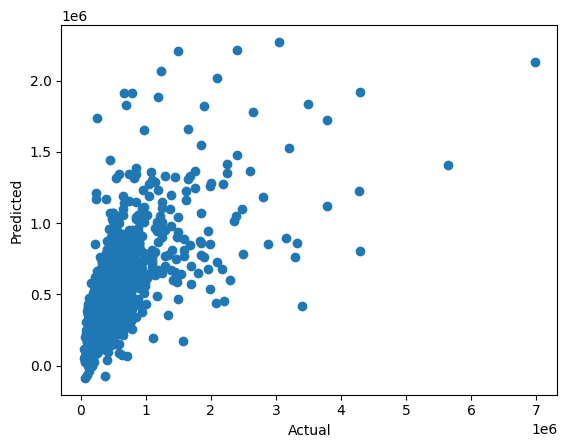

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: >

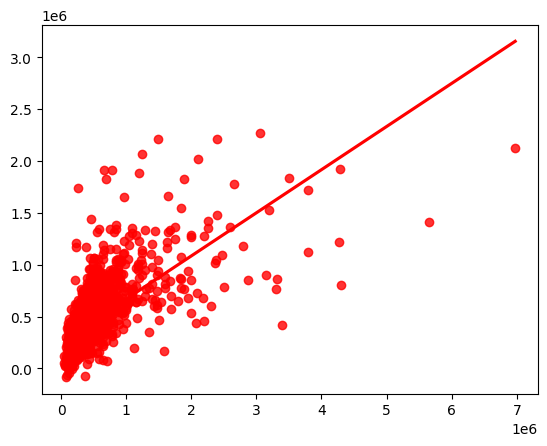

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error:{mse}")
print(f"Root Mean Squared Error:{rmse}")
print(f"R-squared:{r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error:95710851496.55865
Root Mean Squared Error:309371.7044213298
R-squared:0.43536508839660215
Mean Absolute Error: 153480.5929640634
